In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:

!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.03G/1.06G [00:07<00:00, 154MB/s]
100% 1.06G/1.06G [00:07<00:00, 148MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [10]:
from tensorflow import keras

In [11]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [12]:
validation=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [13]:
import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf

In [15]:
train=train.map(lambda x,y:(x/255,y))

In [16]:
validation=validation.map(lambda x,y:(x/255,y))

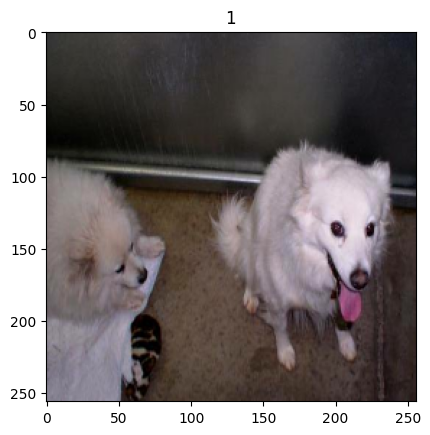

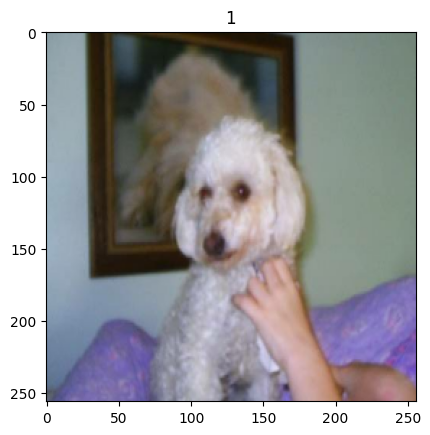

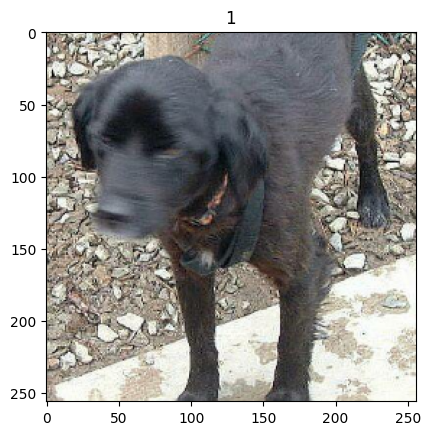

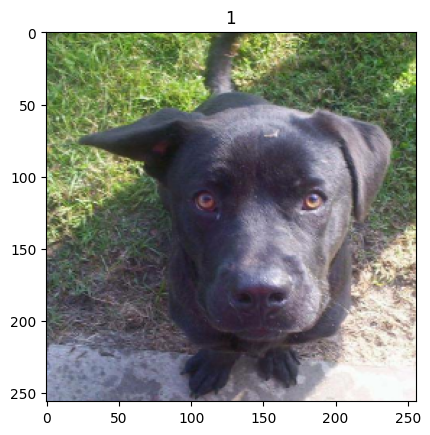

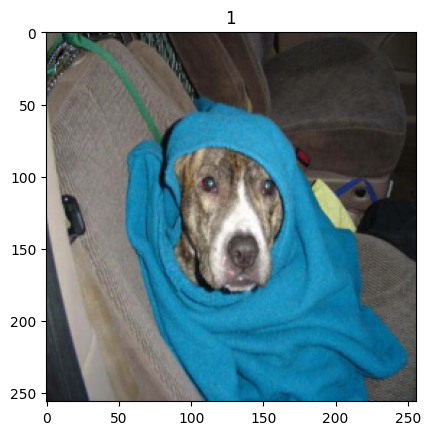

In [17]:
for i,l in train.take(5):
  image=i[0]
  label=l[0]
  plt.imshow((image*255).numpy().astype('uint8'))
  plt.title(label.numpy())
  plt.show()

In [18]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),padding='valid',strides=2),
    Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),padding='valid',strides=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,345 (56.65 MB)

 Trainable params: 14,849,345 (56.65 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=model.fit(train,epochs=10,batch_size=32,validation_data=validation)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.6105 - loss: 0.6669 - val_accuracy: 0.7422 - val_loss: 0.5180
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7532 - loss: 0.5043 - val_accuracy: 0.7872 - val_loss: 0.4750
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8166 - loss: 0.4050 - val_accuracy: 0.8030 - val_loss: 0.4390
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8700 - loss: 0.2980 - val_accuracy: 0.7848 - val_loss: 0.6033
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9237 - loss: 0.1800 - val_accuracy: 0.7718 - val_loss: 0.7781
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9597 - loss: 0.1054 - val_accuracy: 0.7552 - val_loss: 1.1349
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.9742 - loss: 0.0741 - val_accuracy: 0.7778 - val_loss: 1.1409
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9788 - loss: 0.0578 - 

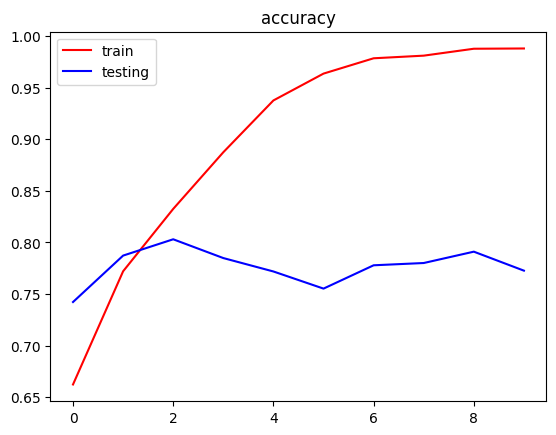

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='testing')
plt.title('accuracy')
plt.legend()
plt.show()

In [24]:
import cv2

In [78]:
test=cv2.imread('/content/Dog_Breeds.jpg')

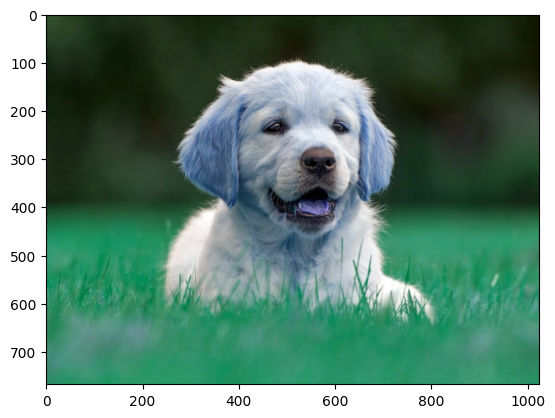

In [79]:
plt.imshow(test)

In [80]:
test.shape

(768, 1024, 3)

In [81]:
test=cv2.resize(test,(256,256))

In [30]:
test.shape

(256, 256, 3)

In [82]:
test_input=test.reshape((1,256,256,3))

In [83]:
c=model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [46]:
def predict(c):
  if(c==1):
    print("DOG")
  else:
    print("CAT")
  return

In [84]:
predict(c)

DOG


In [85]:
a=cv2.imread('/content/cat.1jpg.jpg')

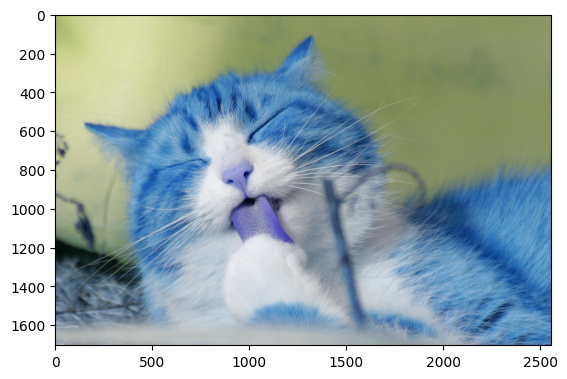

In [86]:
plt.imshow(a)

In [66]:
a.shape

(1704, 2557, 3)

In [87]:
a=cv2.resize(a,(256,256))

In [88]:
a.shape

(256, 256, 3)

In [89]:
input=a.reshape((1,256,256,3))

In [90]:
aa=model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [91]:
predict(aa)

CAT
